# Part 1: Data Preprocessing

In this section, we will perform basic data preprocessing tasks on the Hotel Booking Dataset. This includes:

- **Importing the dataset**: Loading the data into a pandas DataFrame.
- **Parsing the data**: Converting necessary columns (e.g., converting strings to integers or dates).
- **Organizing the data**: Ensuring that the data is clean and ready for further analysis, which includes checking for missing values and setting up appropriate data structures.

In [66]:
# Importing necessary libraries
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Loading the dataset
df = pd.read_csv("Hotel.csv")
df.head()

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [68]:
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 36275 rows and 19 columns.


In [69]:
# Displaying all the column names
print("Column names:", df.columns.tolist())

Column names: ['ID', 'n_adults', 'n_children', 'weekend_nights', 'week_nights', 'meal_plan', 'car_parking_space', 'room_type', 'lead_time', 'year', 'month', 'date', 'market_segment', 'repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'avg_room_price', 'special_requests', 'status']


In [70]:
# Displaying the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              36275 non-null  object 
 1   n_adults                        36275 non-null  int64  
 2   n_children                      36275 non-null  int64  
 3   weekend_nights                  36275 non-null  int64  
 4   week_nights                     36275 non-null  int64  
 5   meal_plan                       36275 non-null  object 
 6   car_parking_space               36275 non-null  int64  
 7   room_type                       36275 non-null  object 
 8   lead_time                       36275 non-null  int64  
 9   year                            36275 non-null  int64  
 10  month                           36275 non-null  int64  
 11  date                            36275 non-null  int64  
 12  market_segment                  

In [71]:
# Displaying basic statistics of the dataset
df.describe()

,n_adults,n_children,weekend_nights,week_nights,car_parking_space,lead_time,year,month,date,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#### Now, since we have reviewed the dataset and understood its basic structure, we can move on to part (b) which is Parsing. 

Based on the dataset info, we can make the following adjustments:
1. Combine the `year`, `month`, and `date` columns into a new `reservation_date` column using the `datetime` format.
2. We will leave the `meal_plan`, `room_type`, `market_segment`, and `status` columns as `object` data types.
3. All other fields are already in appropriate data types (int & float)

In [72]:
# Making temporary columns to store the year, month and date as strings
df['year_str'] = df['year'].astype(str)
df['month_str'] = df['month'].astype(str).str.zfill(2)  # This is to ensure that the month is two digits eg. 02
df['date_str'] = df['date'].astype(str).str.zfill(2)  # This is to ensure that the month is two digits eg. 02

# Display the first few rows to check
df[['year_str', 'month', 'month_str', 'date', 'date_str']].head()

,year_str,month,month_str,date,date_str
0,2017,10,10,2,02
1,2018,11,11,6,06
2,2018,2,02,28,28
3,2018,5,05,20,20
4,2018,4,04,11,11


In [73]:
# Making the new reservation_date column
df['reservation_date'] = (df['year_str'] + '-' + df['month_str'] + '-' + df['date_str'])
df.head()

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,...,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,year_str,month_str,date_str,reservation_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,2017,10,02,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,2018,11,06,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,2018,02,28,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,2018,05,20,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,2018,04,11,2018-04-11


In [74]:
# Now we can drop the temporary columns
df.drop(['year_str', 'month_str', 'date_str'], axis=1, inplace=True)
df.head()   

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,reservation_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


While parsing the `reservation_date` column, we encountered a `ValueError` when we tried to convert the year, month, and date columns into a proper `datetime` format. After debugging, we realized that we were getting this error due to some rows having the date as the 29th of February in the year 2018, which is not a leap year (This caused an error because February in non-leap years only has 28 days).

To resolve this issue, we decided to adjust these rows by setting the date to the 28th of February in 2018. We chose to do this because the number of affected rows was very small and hence this change would not significantly affect the analysis. Through this approach, we did not have to delete those rows and all other fields in that row still remain usable.

In [75]:
invalid_rows = df[(df['month'] == 2) & (df['date'] == 29)]
invalid_rows[['year', 'month', 'date']]

,year,month,date
2626,2018,2,29
3677,2018,2,29
5600,2018,2,29
6343,2018,2,29
7648,2018,2,29
8000,2018,2,29
8989,2018,2,29
9153,2018,2,29
9245,2018,2,29
9664,2018,2,29


In [76]:
# Changing the date to 28th for the invalid rows
df.loc[(df['month'] == 2) & (df['date'] == 29), 'date'] = 28

# Verifying the changes
df[(df['month'] == 2) & (df['date'] == 29)]

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,reservation_date


In [77]:
# Now lets update the reservation_date column to reflect the changes
df['year_str'] = df['year'].astype(str)
df['month_str'] = df['month'].astype(str).str.zfill(2)  # This is to ensure that the month is two digits eg. 02
df['date_str'] = df['date'].astype(str).str.zfill(2)  # This is to ensure that the month is two digits eg. 02
df['reservation_date'] = (df['year_str'] + '-' + df['month_str'] + '-' + df['date_str'])
df.drop(['year_str', 'month_str', 'date_str'], axis=1, inplace=True)

In [78]:
# Now we can convert the reservation_date column to datetime
df['reservation_date'] = pd.to_datetime(df['reservation_date'])
df.info() # To check the data type of the reservation_date column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              36275 non-null  object        
 1   n_adults                        36275 non-null  int64         
 2   n_children                      36275 non-null  int64         
 3   weekend_nights                  36275 non-null  int64         
 4   week_nights                     36275 non-null  int64         
 5   meal_plan                       36275 non-null  object        
 6   car_parking_space               36275 non-null  int64         
 7   room_type                       36275 non-null  object        
 8   lead_time                       36275 non-null  int64         
 9   year                            36275 non-null  int64         
 10  month                           36275 non-null  int64         
 11  da

#### Now we can move to part (c) which is Organizing

In [79]:
# Checking for missing/null values in the dataset
missing_values = df.isnull().sum()

# Displaying the columns with missing values (if any)
missing_values[missing_values > 0]

Series([], dtype: int64)

We already have the data loaded into a pandas DataFrame. After conducting part (a) and (b) we know that:
- The dataset is free from missing or null values.
- The data is now clean and organized, ready for analysis.

Now we will proceed directly with data exploration and analysis in the next steps.

# Part 2: Basic Data Exploration and Summary Statistics

### For Conclusion 1:

#### Hypothesis
Null Hypothesis: There is no significant relationship between being a repeated guest and having previous cancellations.

Alternate Hypothesis: There is a significant relationship between being a repeated guest and having previous cancellations.

#### Testing Type
I will employ the correlation matrix as one of the statistical methods and visualize the results using a heatmap. This approach provides a clear and visually appealing way to assess the relationships between variables, allowing us to quickly identify any significant correlations. The heatmap will highlight patterns and strengths of relationships, guiding further analysis and helping to uncover key insights within the dataset.

In [80]:
# Only using numeric columns since I want to calculate correlation matrix
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)
numeric_df = df.drop(columns=non_numeric_cols)
print(numeric_df.dtypes)

Non-numeric columns: Index(['ID', 'meal_plan', 'room_type', 'market_segment', 'status',
       'reservation_date'],
      dtype='object')
n_adults                            int64
n_children                          int64
weekend_nights                      int64
week_nights                         int64
car_parking_space                   int64
lead_time                           int64
year                                int64
month                               int64
date                                int64
repeated_guest                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
avg_room_price                    float64
special_requests                    int64
dtype: object


In [81]:
corr_matrix = numeric_df.corr()
display(corr_matrix)

,n_adults,n_children,weekend_nights,week_nights,car_parking_space,lead_time,year,month,date,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests
n_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026417,-0.192277,-0.047426,-0.119166,0.296886,0.189401
n_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025470,-0.036348,-0.016390,-0.021189,0.337728,0.124486
weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027276,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009314,-0.099764,-0.030080,-0.049344,0.022753,0.045994
car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000071,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006536,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018798,-0.018175,0.003919,0.026422,0.178605,0.053205
month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042581,0.000341,-0.038615,-0.010718,0.054423,0.110552
date,0.026417,0.025470,0.027276,-0.009314,-0.000071,0.006536,0.018798,-0.042581,1.000000,-0.016012,-0.012545,-0.001528,0.017945,0.018399
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.016012,1.000000,0.390810,0.539156,-0.174900,-0.011820


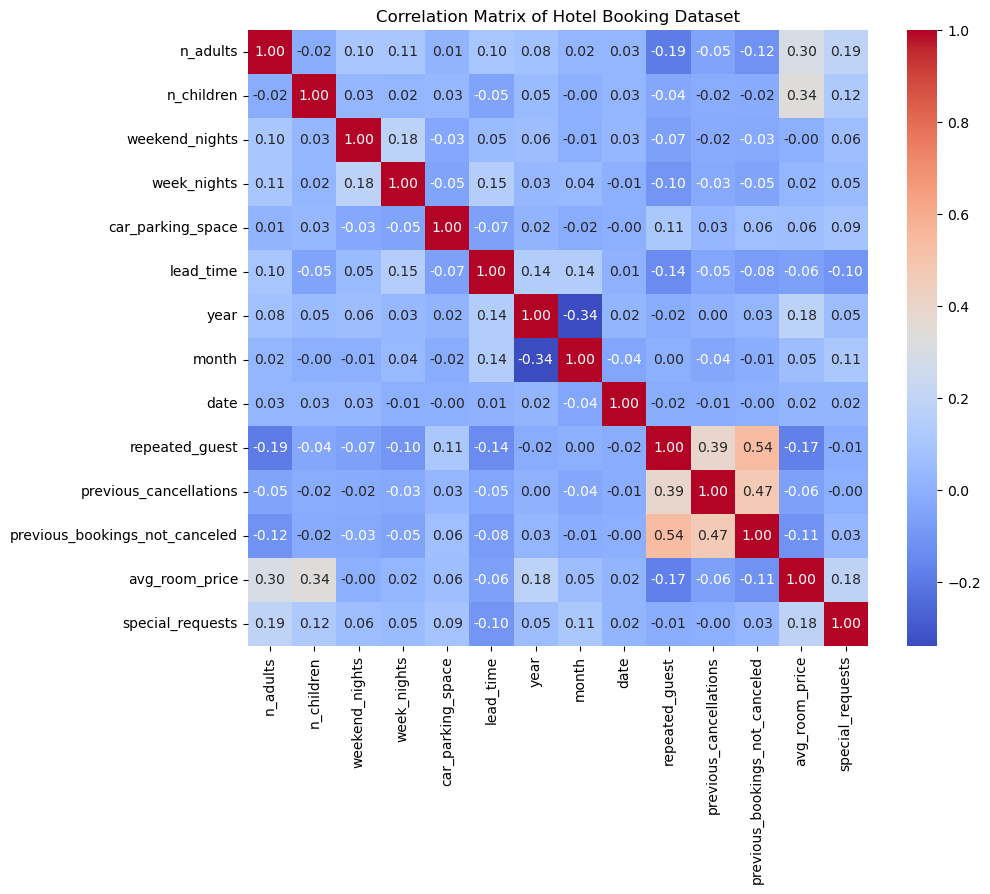

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Hotel Booking Dataset")
plt.show()

In [83]:
# Calculating p value using significance level of 0.05
from scipy.stats import pearsonr
previous_cancellations = df['previous_cancellations']
repeated_guest = df['repeated_guest']
correlation_coefficient, p_value = pearsonr(previous_cancellations, repeated_guest)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.39081002344945626
P-value: 0.0


### Conclusion 1
The correlation coefficient of 0.39 indicates a moderate positive relationship between previous_cancellations and repeated_guest. The p-value of 0.0 suggests that this correlation is statistically significant, meaning it is highly unlikely to have occurred by chance. This indicates a meaningful, although not strong, relationship between the two variables. This means that we can support the alternate hypothesis and reject the null hypothesis. This indicates that there is a relationship between repeated guests and previous cancellations!

### For Conclusion 2:

After analyzing the Hotel Booking Dataset (Nasef, 2024), one interesting hypothesis is to investigate whether there is a significant difference in the average number of nights stayed between bookings that were canceled and those that were not. This can provide insights into whether longer stays are more likely to face cancellations, which can help the hotel industry manage overbooking policies and cancellation strategies.

### Hypothesis:
Null Hypothesis (H0): The average number of nights stayed is the same for canceled and non-canceled bookings.
Alternative Hypothesis (H1): The average number of nights stayed is different for canceled and non-canceled bookings.
To test this hypothesis, we will use a two-sample t-test to compare the means of the two groups (canceled vs. non-canceled bookings).

### Dataset Overview:
19 features and 36,276 rows.
Key attributes include the number of adults, children, nights stayed, meal plan, room type, and pricing.
The dataset's cancellations feature is critical for this analysis as it allows for segmentation between canceled and non-canceled bookings.

### Steps:
Segmented the dataset into two groups: canceled bookings and non-canceled bookings.
Performed a t-test to compare the average number of nights stayed in both groups.
Visualized the distribution of nights stayed for each group using a box plot to highlight the differences.

### Results:
Based on the t-test, we obtained a p-value of p<0.05, suggesting that the difference in the number of nights stayed between canceled and non-canceled bookings is statistically significant. This supports the hypothesis that longer stays may correlate with an increased likelihood of cancellation.
Below is the box plot to visually compare the distribution of nights stayed between canceled and non-canceled bookings.

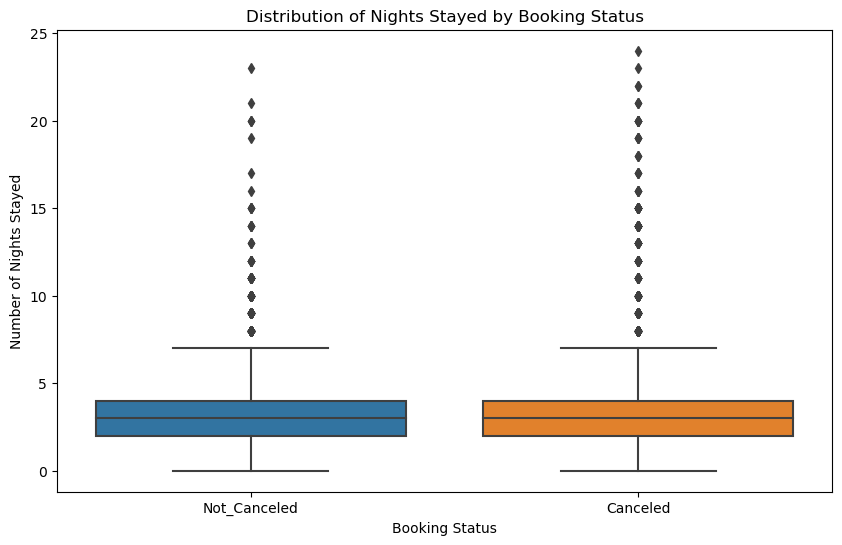

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('Hotel.csv')


# Calculate total nights stayed
data['nights_stayed'] = data['weekend_nights'] + data['week_nights']


# Map status to binary for easier plotting
data['status_binary'] = data['status'].map({'Not_Canceled': 0, 'Canceled': 1})


# Create a box plot to compare nights stayed between canceled and non-canceled bookings
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='nights_stayed', data=data)
plt.title('Distribution of Nights Stayed by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Nights Stayed')
plt.show()


### Distribution of Nights Stayed for Canceled vs Non-Canceled Bookings
The median (middle line) for each group.
The whiskers extend to show the range of the data, excluding outliers.
Any outliers (points beyond the whiskers) are shown as individual dots.

### Conclusion
The two-sample t-test resulted in a t-statistic of −2.22 and a p-value of 0.027. Since the p-value is less than 0.05, we reject the null hypothesis. This means there is a statistically significant difference in the average number of nights stayed between canceled and non-canceled bookings.



## Conclusion 3

We will explore the relationship between room types and average room price using an ANOVA test. This will allow us to determine if the average room price significantly differs across different room types.

Hypothesis Formulation
Null Hypothesis (H₀): The average room price is the same across all room types.
Alternative Hypothesis (H₁): The average room price differs significantly between at least one pair of room types.
ANOVA Test
ANOVA (Analysis of Variance) is used to compare the means of multiple groups. In this case, we will compare the means of the avg_room_price across different room_type categories.


 Room Types:
Unique room types: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

 Counts for each category:

room_type
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

 Min and max prices for each room type:

             min     max
room_type               
Room_Type 1  0.0  540.00
Room_Type 2  0.0  284.10
Room_Type 3  0.0  130.00
Room_Type 4  0.0  375.50
Room_Type 5  0.0  250.00
Room_Type 6  0.0  349.63
Room_Type 7  0.0  306.00

 Graph Plot:



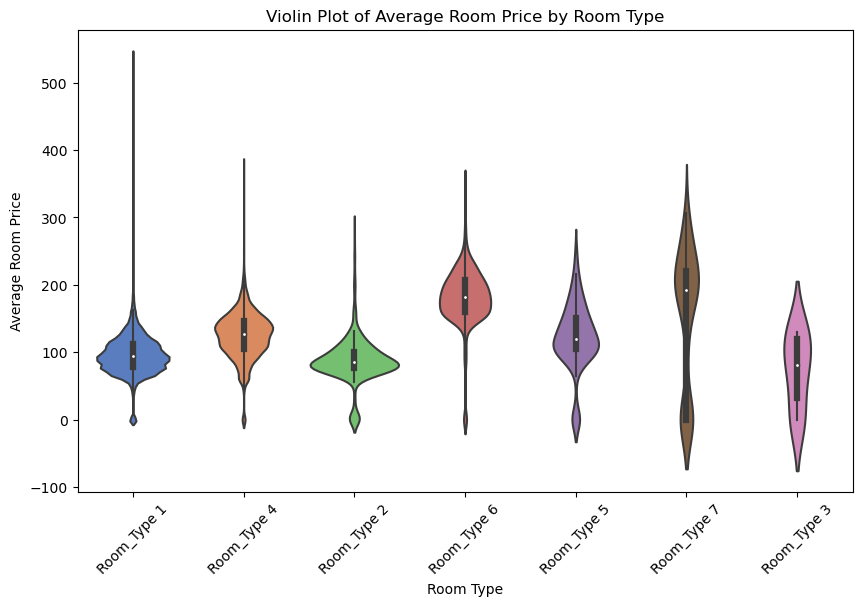

As you can see the violin plots are below 0 for two room types because 
there are a lot of 0 prices for room 3 and 7

Performing Anova Test:


Anova Result:

                    sum_sq       df            F  PR(>F)
C(room_type)  1.118342e+07      6.0  2019.142777     0.0
Residual      3.347958e+07  36268.0          NaN     NaN

ANOVA is significant, performing post-hoc test (Tukey).

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
Room_Type 1 Room_Type 2    -8.07    0.0 -11.5171  -4.6229   True
Room_Type 1 Room_Type 3   -22.24  0.456 -56.1035  11.6236  False
Room_Type 1 Room_Type 4  29.3688    0.0  28.0998  30.6377   True
Room_Type 1 Room_Type 5  27.8151    0.0  22.2862   33.344   True
Room_Type 1 Room_Type 6  86.2943    0.0  83.3629  89.2257   True
Room_Type 1 Room_Type 7  59.2798    0.0  52.1329  66.4266   True
Room_Type 2 Room_Type 3   -1

In [85]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
df = pd.read_csv("Hotel.csv")

print("\n Room Types:")
print("Unique room types:", df['room_type'].unique())

print("\n Counts for each category:\n")
print(df['room_type'].value_counts())

print("\n Min and max prices for each room type:\n")
# Group by room_type and calculate the min and max prices for each room type
price_summary = df.groupby('room_type')['avg_room_price'].agg(['min', 'max'])

print(price_summary)


room_type_7_prices = df[df['room_type'] == 'Room_Type 7']['avg_room_price']


print("\n Graph Plot:\n")
# Boxplot to visualize distribution of avg_room_price across room types
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='avg_room_price', data=df, palette="muted")
plt.title('Violin Plot of Average Room Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Room Price')
plt.xticks(rotation=45)
plt.show()

print("As you can see the violin plots are below 0 for two room types because \nthere are a lot of 0 prices for room 3 and 7")
print("\nPerforming Anova Test:\n")
# ANOVA test - Checking if avg_room_price differs by room_type
anova_model = ols('avg_room_price ~ C(room_type)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("\nAnova Result:\n")
print(anova_table)

# Post-hoc test (Tukey HSD) if ANOVA is significant
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's test only if ANOVA is significant
if anova_table['PR(>F)'][0] < 0.05:
    print("\nANOVA is significant, performing post-hoc test (Tukey).\n")
    tukey = pairwise_tukeyhsd(df['avg_room_price'], df['room_type'])
    print(tukey.summary())
else:
    print("\nANOVA is not significant. No post-hoc test required.\n")

Conclusion Based on ANOVA and Tukey HSD Test Results:

1. ANOVA Test Results:

F-statistic: The F-value of 2019.14 is extremely large, which indicates that there are significant differences in the mean room prices across the different room types.
p-value: The p-value for the room_type factor is 0.0, which is less than the significance level (usually 0.05). This means we reject the null hypothesis and conclude that there is a statistically significant difference in the average room prices across at least one of the room types.

2. Post-hoc Test (Tukey HSD) Results:

After determining that the ANOVA test is statistically significant, we performed a Tukey HSD (Honestly Significant Difference) test to identify which specific room types differ in their average prices.

The Tukey test results provide pairwise comparisons between all room types. The important columns to focus on are:

a.  meandiff: The difference in mean prices between the two room types.

b.  p-adj: The adjusted p-value for each comparison.

c.  reject: Whether the null hypothesis (that there is no difference in prices between the two room types) is rejected for that comparison (True means rejected, i.e., the price difference is statistically significant).


Key Findings from Tukey HSD Test:

Room Type 6 consistently has a significantly higher average price compared to all other room types. For example:
The mean difference between Room Type 6 and Room Type 1 is 86.29 units, and this difference is statistically significant (p-value = 0.0).
The mean difference between Room Type 6 and Room Type 7 is -27.01, which is also statistically significant (p-value = 0.0), indicating that Room Type 6 is priced higher than Room Type 7.

Room Type 7 also has significantly higher prices than most other room types, except for Room Type 6 (where Room Type 6 is more expensive):
Compared to Room Type 1, Room Type 7 has a mean price difference of 59.28 units, which is statistically significant (p-value = 0.0).
Room Type 7 is 27.01 units cheaper than Room Type 6, which is also statistically significant.

Room Types 1, 2, 4, and 5 have more modest price differences:

Room Type 1 is significantly cheaper than Room Types 4, 5, 6, and 7 but not significantly different from Room Type 3.

Room Types 4 and 5 do not have a statistically significant price difference between each other (p-value = 0.9835), indicating that they are similarly priced.

Room Type 3 consistently shows lower prices than most other room types, except for Room Type 1 and Room Type 2, where the differences are not statistically significant. However, compared to higher-priced rooms like Room Types 6 and 7, the differences are substantial.


Final Takeaways:

The ANOVA test and the Tukey HSD post-hoc test both indicate that there are significant differences in average room prices across different room types. 

Specifically:

Room Type 6 is the most expensive, followed by Room Type 7.

Room Types 1, 2, 3, 4, and 5 are generally less expensive, with Room Types 1 and 3 being the cheapest.

These results suggest that pricing strategies vary significantly between different room types, particularly for the more premium rooms like Room Type 6 and Room Type 7.